In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import sph_harm ###função do python para calcular os harmônicos

In [2]:
def valores():
    l = -1
    m = 0
    while l < 0 or not (-l <= m <= l):
        l = int(input("Digite o valor de l:"))
        if l < 0:
            continue     
        m = int(input("Digite o valor de m:"))
        if not (-l <= m <= l):
            continue
    return l, m

In [3]:
l, m = valores()

In [4]:
phi = np.linspace(0, 2 * np.pi, 100) #phi varia de 0 a 2pi
teta = np.linspace(0, np.pi, 100) #teta varia de 0 a pi 

teta, phi = np.meshgrid(teta, phi)

In [5]:
Y_l_m = sph_harm(m, l, phi, teta) ###calcular os harmonicos baseado nos valores de l e m

print(Y_l_m)

[[ 0.        +0.00000000e+00j -0.04096375+0.00000000e+00j
  -0.08157715+0.00000000e+00j ... -0.08157715+0.00000000e+00j
  -0.04096375+0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04088127-2.59808139e-03j
  -0.08141291-5.17394283e-03j ... -0.08141291-5.17394283e-03j
  -0.04088127-2.59808139e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04063419-5.18570122e-03j
  -0.08092085-1.03270520e-02j ... -0.08092085-1.03270520e-02j
  -0.04063419-5.18570122e-03j  0.        +0.00000000e+00j]
 ...
 [ 0.        +0.00000000e+00j -0.04063419+5.18570122e-03j
  -0.08092085+1.03270520e-02j ... -0.08092085+1.03270520e-02j
  -0.04063419+5.18570122e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04088127+2.59808139e-03j
  -0.08141291+5.17394283e-03j ... -0.08141291+5.17394283e-03j
  -0.04088127+2.59808139e-03j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.04096375+1.00332243e-17j
  -0.08157715+1.99806400e-17j ... -0.08157

In [6]:
r = np.abs(Y_l_m.real) ###pega o valor absoluto da parte real (a função é complexa)

print(r)

[[0.         0.04096375 0.08157715 ... 0.08157715 0.04096375 0.        ]
 [0.         0.04088127 0.08141291 ... 0.08141291 0.04088127 0.        ]
 [0.         0.04063419 0.08092085 ... 0.08092085 0.04063419 0.        ]
 ...
 [0.         0.04063419 0.08092085 ... 0.08092085 0.04063419 0.        ]
 [0.         0.04088127 0.08141291 ... 0.08141291 0.04088127 0.        ]
 [0.         0.04096375 0.08157715 ... 0.08157715 0.04096375 0.        ]]


In [7]:
###transformação em coordenadas cartesianas
x = r * np.sin(teta) * np.cos(phi)
y = r * np.sin(teta) * np.sin(phi)
z = r * np.cos(teta)

print(x)
print()
print(y)
print()
print(z)

[[0.         0.0012997  0.00517394 ... 0.00517394 0.0012997  0.        ]
 [0.         0.00129447 0.00515313 ... 0.00515313 0.00129447 0.        ]
 [0.         0.00127887 0.00509103 ... 0.00509103 0.00127887 0.        ]
 ...
 [0.         0.00127887 0.00509103 ... 0.00509103 0.00127887 0.        ]
 [0.         0.00129447 0.00515313 ... 0.00515313 0.00129447 0.        ]
 [0.         0.0012997  0.00517394 ... 0.00517394 0.0012997  0.        ]]

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  8.22657917e-05  3.27491059e-04 ...  3.27491059e-04
   8.22657917e-05  0.00000000e+00]
 [ 0.00000000e+00  1.63207896e-04  6.49712664e-04 ...  6.49712664e-04
   1.63207896e-04  0.00000000e+00]
 ...
 [-0.00000000e+00 -1.63207896e-04 -6.49712664e-04 ... -6.49712664e-04
  -1.63207896e-04 -0.00000000e+00]
 [-0.00000000e+00 -8.22657917e-05 -3.27491059e-04 ... -3.27491059e-04
  -8.22657917e-05 -0.00000000e+00]
 [-0.00000000e+00 -3.1833

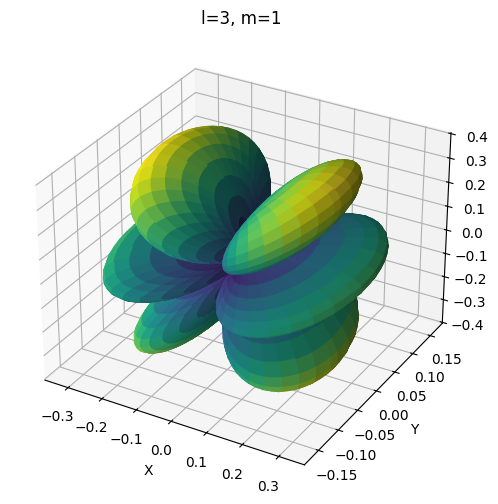

In [8]:
figura = plt.figure(figsize=(8, 6))
eixo = figura.add_subplot(111, projection='3d')
eixo.plot_surface(x, y, z, facecolors=plt.cm.viridis((r - r.min()) / (r.max() - r.min())))
eixo.set_xlabel("X")
eixo.set_ylabel("Y")
eixo.set_zlabel("Z")
eixo.set_title(f"l={l}, m={m}")

plt.show()